#Exploratory Data Analysis (EDA)
Análise Exploratória de Dados

### 1) Importando pacotes

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import scikit-learn dataset library
from sklearn.datasets import load_iris

### 2) Carregando base de dados

In [ ]:
from sklearn import datasets

In [ ]:
#datasets.load...

In [ ]:
iris = load_iris()

Imprime a descrição dos dados

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

Preparando os dados

In [ ]:
# Caracteristicas
X = iris.data

# Classes
y = iris.target

print('Nomes das Características (x1, x2, x3, x4):\n',
      iris.feature_names, '\n\n',
      'Classes (y):\n',
      iris.target_names)

Nomes das Características (x1, x2, x3, x4):
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 

 Classes (y):
 ['setosa' 'versicolor' 'virginica']


Criando DataFrame para armazenar os dados e facilitar a manipulação

In [ ]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
df_iris = pd.DataFrame(X, columns=iris.feature_names)
df_iris.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [ ]:
df_iris

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

Adicionando a coluna 'species' [CLASS (y)] ao DataFrame

In [ ]:
df_iris['species'] = y
df_iris.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0

Gerando algumas medidas de estatística descritiva dos dados

In [ ]:
df_iris.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

Contabiliza a quantidade de elementos de cada classe

In [ ]:
df_iris['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

Correlação das colunas

In [ ]:
# IMPORTANTE:
# CLASSE `species` eh categorico, NECESSÁRIO remover das corrrelacoes

df_iris = df_iris.drop('species', axis=1)

In [ ]:
df_iris_corr = df_iris.corr(method='pearson')
df_iris_corr

sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000

### 3) Gráfico HEATMAP das correlações

O gráfico Heatmap é uma ferramenta poderosa para visualizar matrizes de correlação, principalmente porque ele permite identificar padrões e relações entre as variáveis de forma intuitiva e visual.

**Vantagens:**

* **Representação clara:** A intensidade da cor em cada célula do Heatmap representa a força da correlação entre as variáveis. Cores mais escuras ou vibrantes indicam correlações fortes, enquanto cores mais claras representam correlações mais fracas ou ausentes.
* **Identificação rápida de padrões:** Permite identificar facilmente as variáveis que possuem alta correlação positiva ou negativa.
* **Facilidade de interpretação:** A visualização em formato de matriz facilita a compreensão da relação entre várias variáveis ao mesmo tempo.
* **Destaca outliers:**  Valores de correlação atípicos se destacam visualmente, permitindo investigação adicional.


**No contexto da análise de dados, o heatmap torna a interpretação da matriz de correlação muito mais eficaz do que uma tabela numérica.** Ele oferece uma visão geral rápida e eficaz das relações entre as variáveis, auxiliando na identificação de possíveis problemas de multicolinearidade, na seleção de features importantes para modelos preditivos, e na compreensão da estrutura geral dos dados.

---

Podemos criar um mapa de calor (heatmap) usando a função `sns.heatmap` da biblioteca seaborn.

**sns.heatmap(...)**

- `df_iris.corr()`:  É o DataFrame de correlação que será usado para criar o heatmap.

- vmin=-1`: Define o valor mínimo para a escala de cores. Aqui, o valor mínimo é -1.

- `vmax=1`: Define o valor máximo para a escala de cores. Aqui, o valor máximo é 1.

- `cmap="Blues"`: Define o mapa de cores que será usado. Aqui, a paleta "Blues" será utilizada, resultando em cores que variam de azul claro para azul escuro com base na intensidade dos valores.

    https://seaborn.pydata.org/tutorial/color_palettes.html


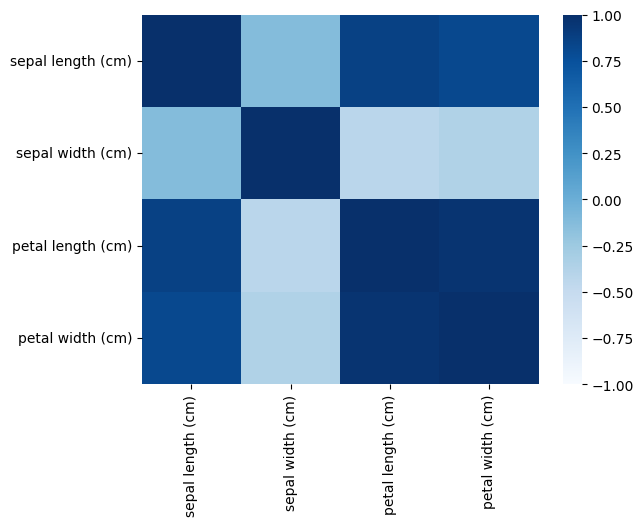

In [ ]:
# Chama o método para plotar o gráfico heatmap
sns.heatmap(df_iris.corr(), vmin=-1, vmax=1, cmap="Blues");

---
É possível configurar alguns os parâmetros para plotar gráficos com informações personalizada.

Veja o exemplo abaixo:

**<font color='darkblue'>
`sns.heatmap(df_iris.corr(), annot=True, fmt=".2f", linewidths=.5, ax=ax, vmin=-1, vmax=1, cmap='Blues')`;
</font>**

* **`df_iris.corr()`**: DataFrame contendo a matriz de correlação dos dados do Iris.

* **`annot=True`**: exibe os valores de correlação em cada célula do heatmap.

* **`fmt=".2f"`**: define o formato dos valores exibidos como números com duas casas decimais.

* **`linewidths=.5`**: define a largura da linha que separa cada célula do heatmap, tornando-o mais visível.

* ax=ax: especifica o eixo (axes) onde o heatmap será plotado.

* **`vmin=-1`**: define o valor mínimo da escala de cores, -1 para a correlação mais negativa.

* **`vmax=1`**: define o valor máximo da escala de cores, 1 para a correlação mais positiva.

* **`cmap='Blues'`**: define a paleta de cores, 'Blues' para uma escala que vai de azul claro para azul escuro, representando os valores de correlação.


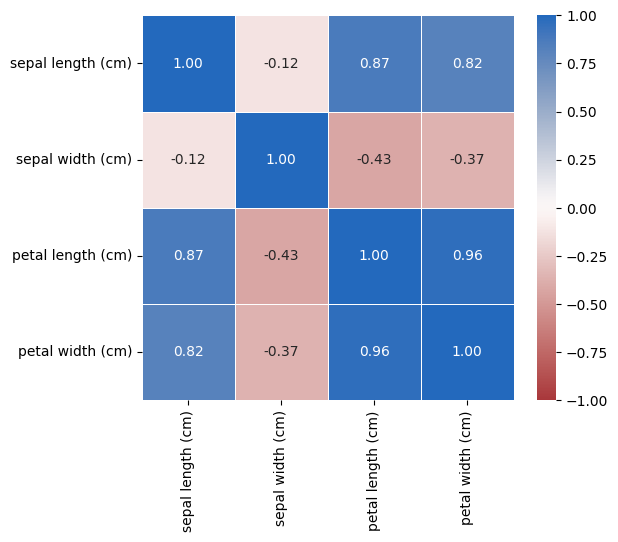

In [ ]:
# Instancia uma figura para plotar o gráfico e um eixo (subplot)
# com tamanho definido (6x5 polegadas).
# Isso é necessário para exibir o heatmap dentro de um espaço específico no gráfico.

f, ax = plt.subplots(figsize=(6, 5));

sns.heatmap(df_iris.corr(), annot=True, fmt=".2f", linewidths=.5, ax=ax, vmin=-1, vmax=1, cmap='vlag_r');

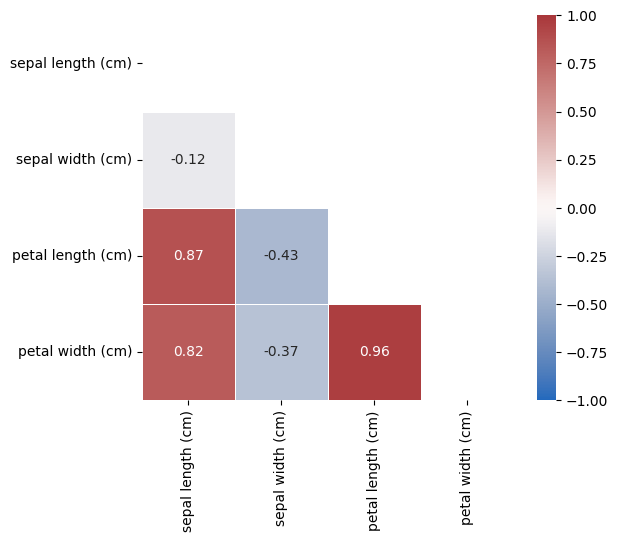

In [ ]:
f, ax = plt.subplots(figsize=(6, 5))

# Cria uma máscara triangular superior a partir da matriz de correlação df_iris_corr.
# A máscara triu retorna uma matriz com 1 na parte triangular superior,
# incluindo a diagonal, e 0 no resto.
# Isso é usado para ocultar a metade superior da matriz de correlação no heatmap,
# pois a correlação é simétrica e evitar redundância na visualização.
mask = np.triu(df_iris_corr)

# Plota o heatmap da matriz de correlação df_iris_corr usando a biblioteca seaborn.
sns.heatmap(df_iris_corr, ax=ax, mask=mask,
            annot=True, fmt=".2f", linewidths=0.5,
            vmin=-1, vmax=1, cmap="vlag");
# ax=ax: Especifica o eixo onde o heatmap será plotado (o que foi criado anteriormente com plt.subplots).
# mask=mask: Aplica a máscara criada, ocultando a parte triangular superior do heatmap.
# annot=True: Mostra os valores de correlação dentro de cada célula do heatmap.
# fmt=".2f": Formata os valores de correlação com duas casas decimais.
# linewidths=0.5: Define a largura das linhas que separam as células do heatmap.
# vmin=-1, vmax=1: Define os valores mínimo e máximo da escala de cores, indo de -1 a 1 (correlação negativa a positiva).
# cmap="vlag": Define a paleta de cores para o heatmap, usando a paleta "vlag", que possui cores divergentes (vermelho e azul).

Paleta de cores completa do SEABORN (SNS)

https://www.practicalpythonfordatascience.com/ap_seaborn_palette

---


### 4) Boxplot dos dados

Outra tipo de gráfico muito importante é o Boxplot, que é uma ferramenta útil para visualizar a distribuição de um conjunto de dados.
Ele mostra a mediana, os quartis e os outliers.

As partes principais de um boxplot são:

- **A caixa**: Representa o intervalo interquartil (IQR), que contém 50% dos dados.
- **A linha central na caixa**: Representa a mediana dos dados.
- **As linhas que se estendem da caixa**: São os limites inferior e superior, que representam 1,5 vezes o IQR.
- **Os pontos fora das linhas**: São os outliers, que são valores que estão fora do intervalo interquartil.



**O que um boxplot mostra?**

Um boxplot fornece uma visualização resumida da distribuição de uma variável numérica. Ele mostra:

- **A mediana** (linha dentro da caixa): O valor do meio dos dados.
- **O primeiro e o terceiro quartis** (caixa): Representam a faixa interquartil (IQR), que contém 50% dos dados.
- **As linhas que se estendem da caixa**: São os limites inferior e superior, que representam 1,5 vezes o IQR. Os dados que estiverem entre os valores limite são considerados nâo-discrepantes.
- **Outliers** (pontos): Valores que estão muito acima ou abaixo dos limites, sugerindo que podem ser valores discrepantes.

**Como interpretar esse boxplot?**

Para cada característica (coluna) do conjunto de dados Iris, o boxplot ajuda a identificar:

- A dispersão dos dados: se a caixa é estreita, a dispersão é pequena; se a caixa é larga, a dispersão é maior.
- A presença de assimetria: se a mediana está mais próxima do limite inferior, os dados são assimétricos à direita; se a mediana está mais próxima do limite superior, os dados são assimétricos à esquerda.
- A presença de outliers: pontos individuais além dos limites sugerem valores que podem ser discrepantes ou anômalos.

---

O método abaixo gera um boxplot (diagrama de caixa) para cada coluna do DataFrame df_iris.

**<font color='darkblue'>
df_iris.boxplot(rot=90)
</font>**

Ao gerar um box plot para cada coluna do `df_iris`, podemos ver a distribuição de cada característica (comprimento da sépala, largura da sépala, comprimento da pétala e largura da pétala) e identificar possíveis *outliers*.

Vamos analisar cada parte:

**`df_iris`**: É o DataFrame que contém os dados do conjunto de dados Iris.

**`.boxplot()`**: É um método do pandas DataFrame que cria um box plot para cada coluna numérica do DataFrame.

Parâmetros:

* **`rot=90`**: Esse argumento rota os rótulos do eixo x em 90 graus.
Isso é útil quando os nomes das colunas são longos e podem se sobrepor.

* **`figsize=(10, 5)`**: Define o tamanho da figura do boxplot em polegadas (largura, altura).



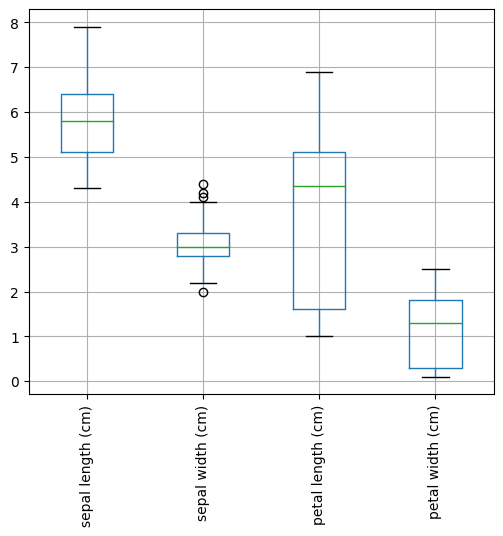

In [ ]:
# Exemplo de Boxplot gerado pelo dataframe do pandas
df_iris.boxplot(figsize=(6, 5), rot=90);

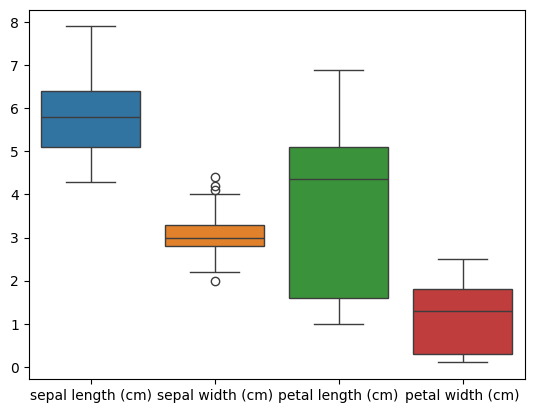

In [ ]:
# Exemplo de boxplot gerado pela ferramenta seaborn
sns.boxplot(data=df_iris);

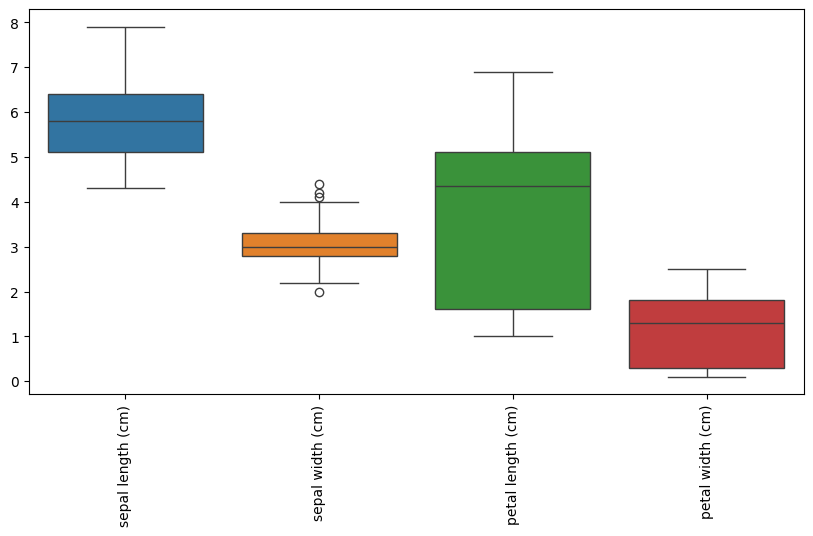

In [ ]:
# Exemplo de código do seaborn para plotar boxplots do df_iris
# com tamanho (10,5) e rotação de 90 graus na legenda horizontal

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_iris)
plt.xticks(rotation=90)
plt.show()

Para os comandos abaixo, vamos voltar a classe `species` do dataframe
`df_iris` para melhor visualização conjunta dos resultados.

In [ ]:
df_iris['species'] = y
df_iris

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  
0          0  
1          0  
2          0  
3          0  
4          0  
..       ...  
145        2  
146        2  
147        2  
148        2  
149        2  

[150 rows x 5 columns]

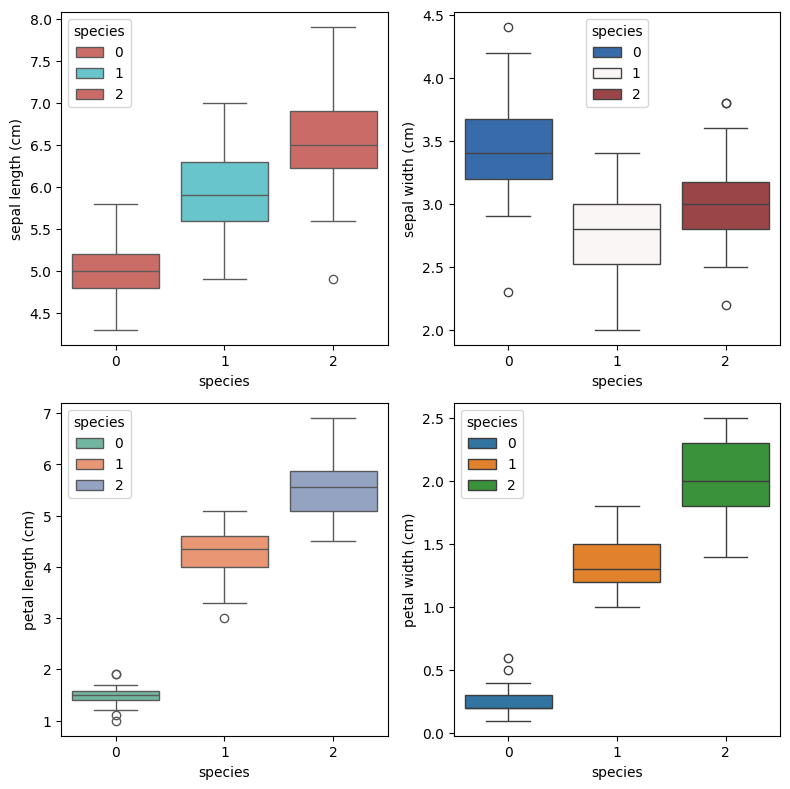

In [ ]:
# Boxplots to visualize distributions
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='sepal length (cm)', data=df_iris, hue='species', palette='hls')

plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='sepal width (cm)', data=df_iris, hue='species', palette='vlag')

plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='petal length (cm)', data=df_iris, hue='species', palette='Set2')

plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='petal width (cm)', data=df_iris, hue='species', palette='tab10')

plt.tight_layout()


### Gráfico Pairplot

O Pairplot é um gráfico que mostra a relação entre pares de variáveis em um conjunto de dados.
Ele é uma ferramenta útil para visualizar a estrutura geral dos dados, identificar padrões e outliers, e
explorar a correlação entre as variáveis.

Cada gráfico na diagonal principal do Pairplot mostra a distribuição univariada de uma variável.
Os gráficos fora da diagonal principal mostram a relação entre pares de variáveis, usando gráficos de dispersão.
Esses gráficos podem ajudar a identificar padrões, como correlações lineares ou não-lineares, entre as variáveis.

O Pairplot é útil para:

- Visualizar a relação entre pares de variáveis em um conjunto de dados.
- Identificar padrões e outliers.
- Explorar a correlação entre as variáveis.
- Detectar problemas com os dados, como valores ausentes ou variáveis com alta correlação.



Exemplo de como criar um Pairplot com o seaborn:

sns.pairplot(df_iris, hue='species')

Onde:
df_iris é o DataFrame que contém os dados.
hue é uma variável categórica que será usada para colorir os pontos.
O parâmetro hue pode ser usado para separar os pontos de dados por uma terceira variável,
como classe ou grupo, tornando mais fácil visualizar as diferenças entre os grupos.

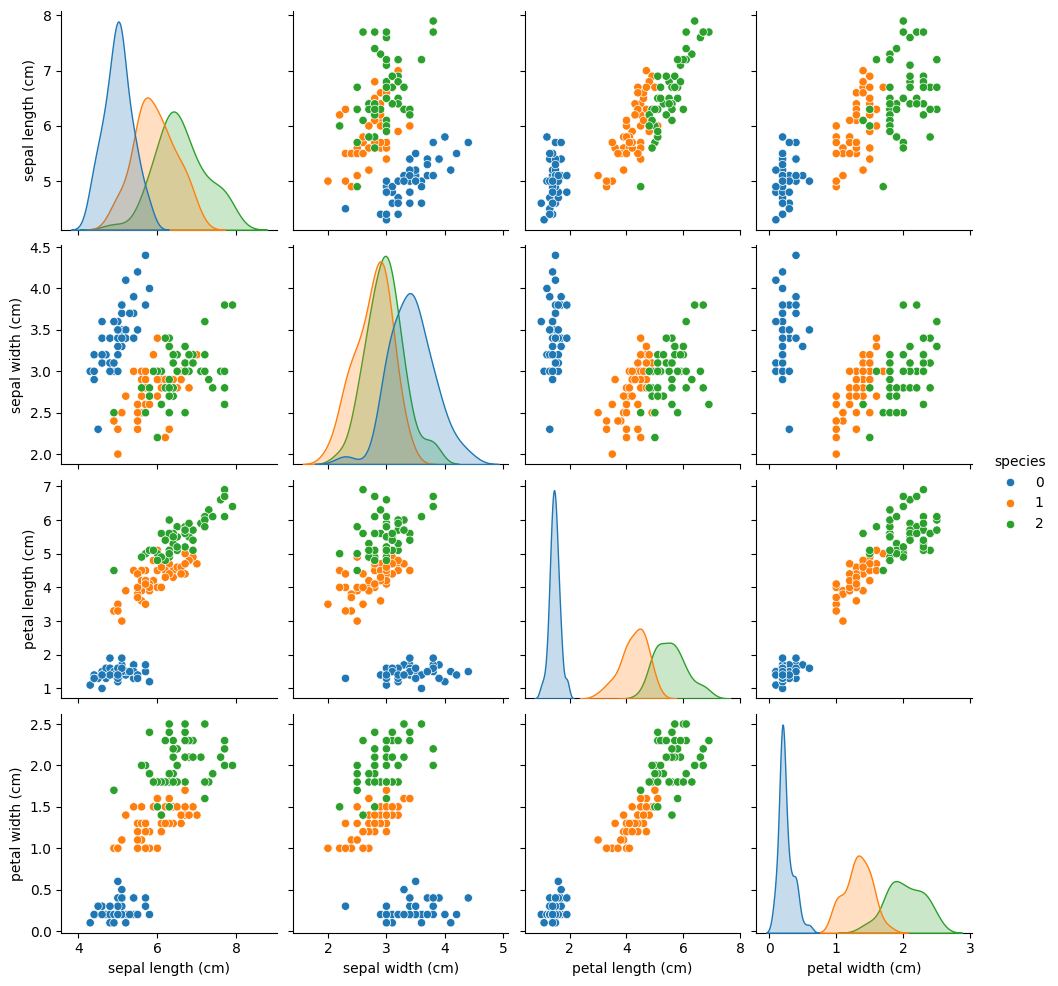

In [ ]:
sns.pairplot(df_iris, height=2.5, hue='species', palette='tab10');

### Exercícios:

Dica: para os exercícios abaixo, será necessário realizar uma pesquisa dos comandos apropriados.

Nome completo do aluno/a:

1) Você utilizou a função/método `pairplot` para realizar visualizar as dispersões par-a-par em dados multivariados. Agora, imagine que os dados fossem **univariados**, ou seja, você tivesse apenas uma variável, por exemplo X[3].


***Pesquise/descubra*** como visualizar o histograma para esta única variável (não usar mais o método `pairplot`. Coloque seu código aqui:

In [ ]:
X_uni = X[3]
# coloque o seu código aqui abaixo...



2) Você utilizou a função/método `describe` para realizar uma estatística descritiva básica dos dados. Agora, usando os dados univariados do exercício anterior (X_uni), descubra como calcular a *Skewness* e *Kurtosis* para esta variável/característica. Coloque seu código aqui:

In [ ]:
# calcule e imprima Skewness e Kurtosis de X_uni




3) Agora, descubra como calcular a *Skewness* e *Kurtosis* para cada uma das características (obs: usar X, ou seja, todas as 4). Digite se código abaixo:

In [ ]:
# calcule e imprima Skewness e Kurtosis
# para todas as características (X[0-3])




4) (*) Descubra como calcular todas as correlações (Spearman) par-a-par entre todas as características. Digite se código abaixo:

In [ ]:
# calcule as correlações para todas as características (X[0-3])




5) Exercício Desafio: Pesquise/descubra como imprimir um gráfico heatmap com um mapa de cores diferente dos usados anteriormente e utilize-o para plotar as correlações par-a-par calculadas no item anterior. Coloque seu código aqui:

In [ ]:
# plote o gráfico heatmap das correlações




## WINE DATASET - EDA

In [ ]:
# Refaça todas as análises feitas anteriormente, mas agora usando o dataset WINE.

from sklearn.datasets import load_wine

In [ ]:
wine = load_wine()

df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
# df_wine['target'] = wine.target

df_wine

In [ ]:
# coloque seu código a partir desta célula

In [ ]:
print(wine.DESCR)

In [ ]:
df_wine.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

In [ ]:
df_wine.corr()

alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
od280/od315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   

                              alcalinity_of_ash  magnesium  total_phenols  \
alcohol                               -0.310235   0.270798       0.289101   
malic_acid                             0.288500  -0.054575      -0.335167   
ash                                    0.443367   0.286587       0.128980   
alcalinity_of_ash                      1.000000  -0.083333      -0.321113   
magnesium                             -0.083333   1.000000       0.214401   
total_phenols                         -0.321113   0.214401       1.000000   
flavanoids                            -0.351370   0.195784       0.864564   
nonflavanoid_phenols                   0.361922  -0.256294      -0.449935   
proanthocyanins                       -0.197327   0.236441       0.612413   
color_intensity                        0.018732   0.199950      -0.055136   
hue                                   -0.273955   0.055398       0.433681   
od280/od315_of_diluted_wines          -0.276769   0.066004       0.699949   
proline                               -0.440597   0.393351       0.498115   

                              flavanoids  nonflavanoid_phenols  \
alcohol                         0.236815             -0.155929   
malic_acid                     -0.411007              0.292977   
ash                             0.115077              0.186230   
alcalinity_of_ash              -0.351370              0.361922   
magnesium                       0.195784             -0.256294   
total_phenols                   0.864564             -0.449935   
flavanoids                      1.000000             -0.537900   
nonflavanoid_phenols           -0.537900              1.000000   
proanthocyanins                 0.652692             -0.365845   
color_intensity                -0.172379              0.139057   
hue                             0.543479             -0.262640   
od280/od315_of_diluted_wines    0.787194             -0.503270   
proline                         0.494193             -0.311385   

                              proanthocyanins  color_intensity       hue  \
alcohol                              0.136698         0.546364 -0.071747   
malic_acid                          -0.220746         0.248985 -0.561296   
ash                                  0.009652         0.258887 -0.074667   
alcalinity_of_ash                   -0.197327         0.018732 -0.273955   
magnesium                            0.236441         0.199950  0.055398   
total_phenols                        0.612413        -0.055136  0.433681   
flavanoids                           0.652692        -0.172379  0.543479   
nonflavanoid_phenols                -0.365845         0.139057 -0.262640   
proanthocyanins                      1.000000        -0.025250  0.295544   
color_intensity                     -0.025250         1.000000 -0.521813   
hue                                  0.295544        -0.521813  1.000000   
od280/od315_of_diluted_wines         0.519067        -0.428815  0.565468   
proline                              0.330417         0.316100  0.236183   

                              od280/od315_of_diluted_wines   prol

In [ ]:
df_wine_corr = df_wine.corr(method='spearman')

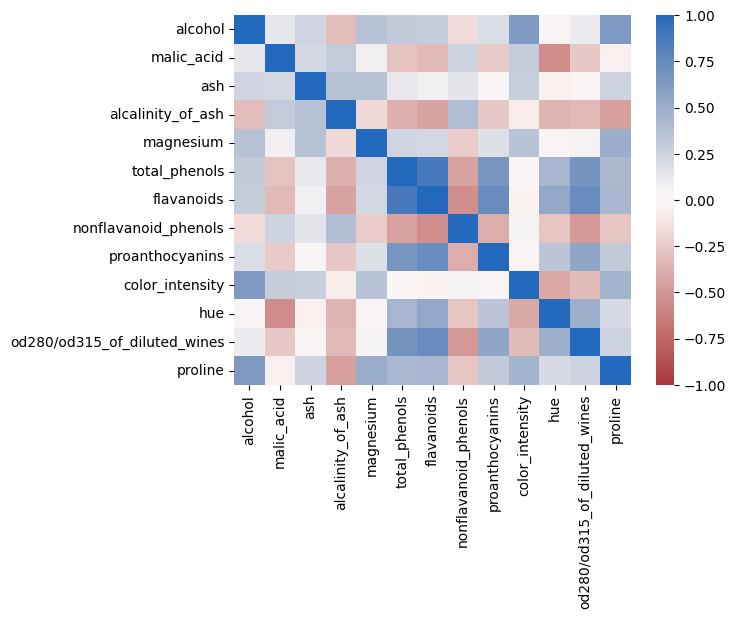

In [ ]:
sns.heatmap(df_wine_corr, vmin=-1, vmax=1, cmap="vlag_r");

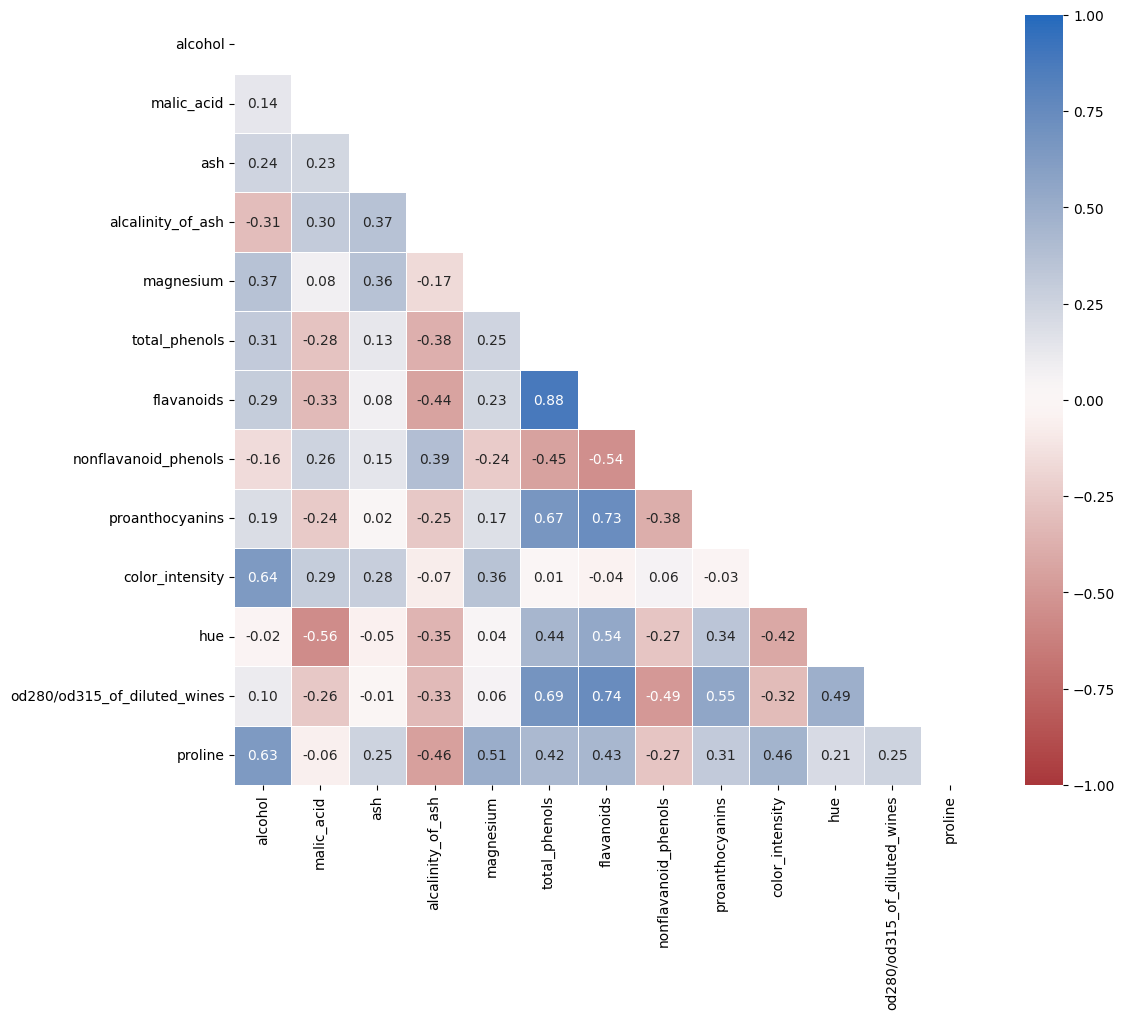

In [ ]:
f, ax = plt.subplots(figsize=(12, 10))

# Cria uma máscara triangular superior a partir da matriz de correlação df_wine_corr.
# A máscara triu retorna uma matriz com 1 na parte triangular superior,
# incluindo a diagonal, e 0 no resto.
# Isso é usado para ocultar a metade superior da matriz de correlação no heatmap,
# pois a correlação é simétrica e evitar redundância na visualização.
mask = np.triu(df_wine_corr)

# Plota o heatmap da matriz de correlação df_wine_corr usando a biblioteca seaborn.
sns.heatmap(df_wine_corr, ax=ax, mask=mask,
            annot=True, fmt=".2f", linewidths=0.5,
            vmin=-1, vmax=1, cmap="vlag_r");
# ax=ax: Especifica o eixo onde o heatmap será plotado (o que foi criado anteriormente com plt.subplots).
# mask=mask: Aplica a máscara criada, ocultando a parte triangular superior do heatmap.
# annot=True: Mostra os valores de correlação dentro de cada célula do heatmap.
# fmt=".2f": Formata os valores de correlação com duas casas decimais.
# linewidths=0.5: Define a largura das linhas que separam as células do heatmap.
# vmin=-1, vmax=1: Define os valores mínimo e máximo da escala de cores, indo de -1 a 1 (correlação negativa a positiva).
# cmap="vlag": Define a paleta de cores para o heatmap, usando a paleta "vlag", que possui cores divergentes (vermelho e azul).

In [ ]:
df_wine['class'] = wine.target

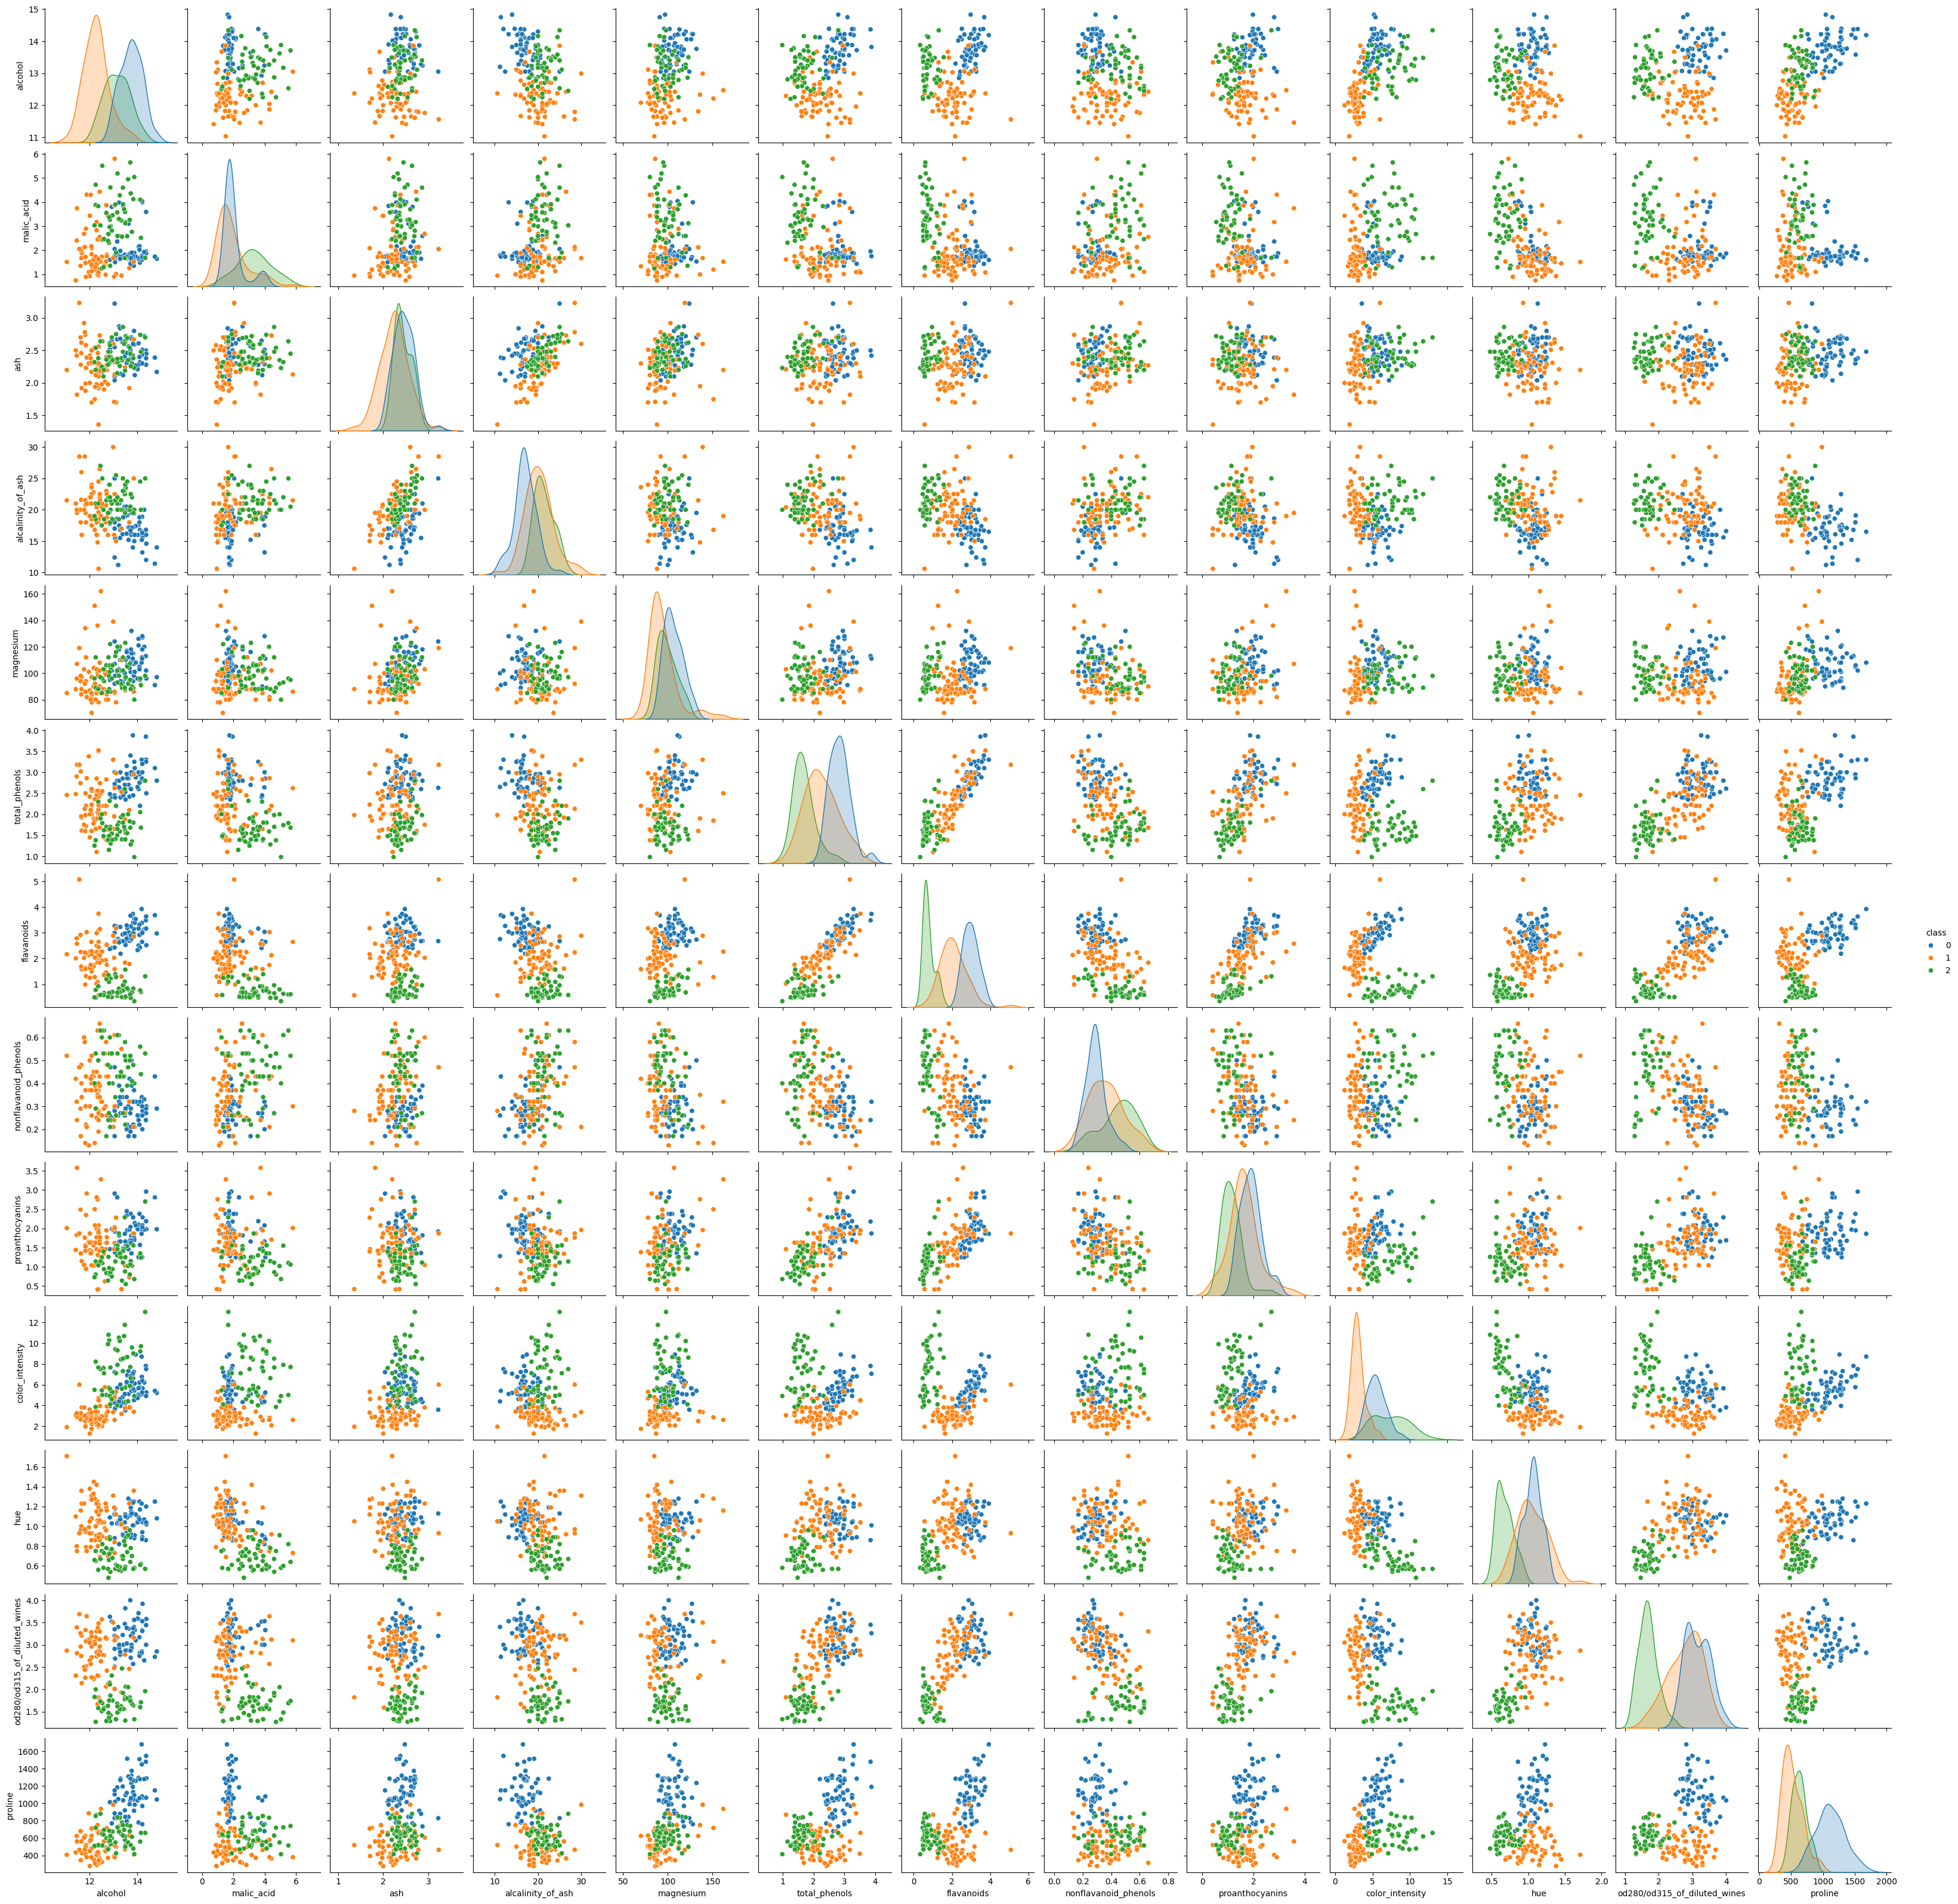

In [ ]:
sns.pairplot(df_wine, height=2.5, hue='class', palette='tab10');